# Projekt I
## Bearbeitet von 

In [1]:
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn

import numpy as np
import pandas as pd

import torch


## Projektaufgaben
1. Wir haben uns hier als Beispiel eine lineare Funktion der Form $f: \mathbb{R} \rightarrow \mathbb{R}$ angeschaut, also ein Input-, ein Output-Wert und zwei Parameter. Bauen Sie ein eigenes Modul (wie oben Beispielhaft mit `MyLinear` geschehen), dass eine lineare Funktion mit $n$ Input-Parametern und $m$ Output-Werten nachbildet, also $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$. Überlegen Sie sich wieviele Parameter eine solche Funktion braucht und wie man sie am besten darstellt.
2. Erzeugen Sie mehrdimensionale Beispieldaten, versehen Sie diese mit Rauschen und trainieren Sie Ihr Modul aus Aufgabe 1. darauf. Mehrdimensionale Funktionen lassen sich schwierig grafisch darstellen. Wie können Sie den Trainingsfortschritt verfolgen?
3. Nutzen Sie das in 1. und 2. Gelernte, um eine Regression auf einem höhergradigen Polynom (quadratisch, kubisch, usw.) $f: \mathbb{R} \rightarrow \mathbb{R}$ umzusetzen. Implementieren Sie ein eigenes Modul (das Modul sollte den Grad des Polynoms im Konstruktor als Input bekommen), erzeugen Sie Beispieldaten und trainieren Sie es. Hier lässt sich der Fortschritt wieder grafisch darstellen. Tun Sie dies. Was fällt beim Training auf?
4. In der Einstiegspräsentation haben wir gesehen, dass ein Neural Network aus aufeinandergestapelten Schichten linearer Funktionen und nicht-linearer Funktionen besteht. Implementieren Sie ein eigenes PyTorch-Modul, was eine nicht-lineare Funktion repräsentiert (Tipp: Nutzen Sie nicht das Polynom aus Aufgabe 3 sondern wählen Sie eine aus der Einstiegspräsentation). Bauen Sie aus diesem Modul und Ihrem Modul aus Aufgabe 1 einen Stapel "lineare Funktion → nicht-lineare Funktion → lineare Funktion" (bspw. mithilfe von [`torch.nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)). Wie schlägt sich dieses MLP im Training mit Ihren mehrdimensionalen Beispieldaten aus 2.?

Bitte fassen Sie Ihre Lösungen in einem eigenen Jupyter-Notebook zusammen!


## Aufgabe 1

In [2]:
class MyLinear(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.coefficients = torch.nn.Parameter(torch.ones(output_size, input_size, dtype=torch.float))
    self.bias = torch.nn.Parameter(torch.ones([output_size], dtype=torch.float))

  def forward(self, x):
        return x @ torch.transpose(self.coefficients,0,1) + self.bias
    

In [3]:
output_dim = 2
input_dim = 3
lin = MyLinear(input_dim, output_dim)
# list(lin.parameters())

## Aufgabe 2

In [4]:
def f(x):
  coefficients = [1, 2, 3]
  bias = [5,20]
  return bias + np.dot(x, coefficients)

In [5]:
num_examples = 50 

df = pd.DataFrame([[np.random.randint(low=0, high=50, size=input_dim)] for x in range(num_examples)], columns=["x"]) # Python-Generator-Syntax
df["f(x)"] = [f(x) for x in df["x"]]
df["f(x)+e"] = np.array(df["f(x)"]) + np.random.randn(num_examples)*2 
# df[:10]

In [6]:
x = torch.tensor(df["x"], dtype=torch.float)
y = torch.tensor(df["f(x)+e"], dtype=torch.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  """Entry point for launching an IPython kernel.


In [7]:
def train(model, lr, epochs, x, y):
    predictions = [] # wir zeichnen unsere Predictions auf
    model.train()

    for _ in range(epochs):
        y_prediction = model.forward(x)
        predictions.append(y_prediction.tolist())
        mse = torch.mean((y - y_prediction)**2)
        mse.backward()
        with torch.no_grad():
            for param in model.parameters():
                param.sub_(param.grad * lr)
        model.zero_grad()
    
    return predictions

In [8]:
predictions = train(lin, lr=0.001, epochs=200, x=x, y=y)
df["\hat{y_pred}"] = predictions[199]
df

x        f(x)                                    f(x)+e  \
0   [23, 19, 23]  [135, 150]  [135.31791592117668, 150.31791592117668]   
1   [14, 14, 20]  [107, 122]      [104.362846504422, 119.362846504422]   
2   [47, 47, 27]  [227, 242]    [227.5734588084051, 242.5734588084051]   
3    [6, 10, 45]  [166, 181]  [167.43896116594803, 182.43896116594803]   
4   [37, 36, 12]  [150, 165]  [149.49678069785205, 164.49678069785205]   
5   [20, 18, 16]  [109, 124]  [107.13881714478813, 122.13881714478813]   
6   [29, 45, 16]  [172, 187]  [171.48542805348595, 186.48542805348595]   
7   [49, 15, 14]  [126, 141]  [125.62413515829196, 140.62413515829198]   
8    [19, 8, 46]  [178, 193]    [175.5321904449806, 190.5321904449806]   
9   [39, 12, 16]  [116, 131]  [112.35390760736266, 127.35390760736266]   
10   [0, 36, 44]  [209, 224]  [210.13547117915675, 225.13547117915675]   
11  [20, 10, 24]  [117, 132]   [117.14202785945791, 132.1420278594579]   
12    [3, 24, 2]    [62, 77]   [61.985157563854955, 76.98515756385495]   
13  [14, 11, 24]  [113, 128]  [113.56555328700915, 128.56555328700915]   
14   [24, 9, 26]  [125, 140]  [121.14098695503476, 136.14098695503475]   
15   [33, 1, 34]  [142, 157]  [143.53486969502893, 158.53486969502893]   
16  [17, 17, 24]  [128, 143]  [130.56279456563723, 145.56279456563723]   
17   [32, 4, 12]    [81, 96]    [81.70525506243997, 96.70525506243997]   
18  [35, 35, 45]  [245, 260]  [247.91779503405456, 262.91779503405456]   
19  [24, 46, 26]  [199, 214]  [195.15877622229877, 210.15877622229877]   
20   [18, 22, 0]    [67, 82]    [70.22042031341839, 85.22042031341839]   
21   [16, 14, 1]    [52, 67]    [51.11472290560657, 66.11472290560657]   
22  [15, 15, 42]  [176, 191]    [178.0137253974943, 193.0137253974943]   
23    [3, 3, 24]   [86, 101]   [87.12922835577514, 102.12922835577514]   
24    [3, 35, 4]   [90, 105]   [90.78125224078036, 105.78125224078036]   
25  [22, 34, 48]  [239, 254]    [240.3884790942498, 255.3884790942498]   
26    [2, 24, 8]    [79, 94]    [79.04804805067207, 94.04804805067207]   
27  [47, 12, 36]  [184, 199]  [182.88169416905302, 197.88169416905302]   
28   [33, 0, 35]  [143, 158]  [138.39135595513457, 153.39135595513457]   
29   [15, 29, 4]   [90, 105]   [88.71726289009753, 103.71726289009753]   
30    [9, 48, 2]  [116, 131]  [118.87870081728815, 133.87870081728815]   
31   [25, 7, 29]  [131, 146]    [130.6285748427001, 145.6285748427001]   
32   [42, 46, 8]  [163, 178]  [165.07228910234443, 180.07228910234443]   
33   [6, 42, 47]  [236, 251]  [238.41500848639487, 253.41500848639487]   
34   [28, 3, 45]  [174, 189]  [172.90270070067876, 187.90270070067876]   
35  [16, 30, 31]  [174, 189]    [171.6755308012944, 186.6755308012944]   
36  [21, 19, 45]  [199, 214]  [197.43489037684566, 212.43489037684566]   
37  [38, 43, 20]  [189, 204]  [188.91700378805615, 203.91700378805615]   
38   [8, 13, 49]  [186, 201]  [187.50327786005613, 202.50327786005613]   
39  [35, 45, 36]  [238, 253]  [236.32847668589062, 251.32847668589062]   
40   [8, 45, 21]  [166, 181]    [163.2887860447809, 178.2887860447809]   
41   [39, 36, 6]  [134, 149]    [134.1977536451981, 149.1977536451981]   
42  [49, 40, 10]  [164, 179]  [165.68214553538502, 180.68214553538502]   
43  [18, 15, 11]   [86, 101]   [91.24840503020778, 106.24840503020778]   
44   [31, 31, 0]   [98, 113]  [102.34124871386993, 117.34124871386993]   
45    [14, 0, 8]    [43, 58]  [44.261494281534326, 59.261494281534326]   
46   [26, 1, 40]  [153, 168]    [155.6797496016764, 170.6797496016764]   
47  [19, 38, 13]  [139, 154]  [136.81443737431417, 151.81443737431417]   
48    [15, 1, 3]    [31, 46]  [28.086832167225346, 43.086832167225346]   
49  [49, 11, 19]  [133, 148]  [130.72413554181924, 145.72413554181924]   

                                \hat{y_pred}  
0    [134.3160400390625, 147.08518981933594]  
1    [105.53132629394531, 115.0492935180664]  
2    [229.1820068359375, 252.37783813476562]  
3   [165.24136352539062, 177.42733764648438]  
4    

In [9]:
# for i in range(len(predictions)):
#   print("epoch ", i, " :\t", predictions[i][0])

# Aufgabe 3
3. Nutzen Sie das in 1. und 2. Gelernte, um eine Regression auf einem höhergradigen Polynom (quadratisch, kubisch, usw.) $f: \mathbb{R} \rightarrow \mathbb{R}$ umzusetzen. Implementieren Sie ein eigenes Modul (das Modul sollte den Grad des Polynoms im Konstruktor als Input bekommen), erzeugen Sie Beispieldaten und trainieren Sie es. Hier lässt sich der Fortschritt wieder grafisch darstellen. Tun Sie dies. Was fällt beim Training auf?

Polynom: $g(x)=\Sigma_i^{(degree)} c_i * x^i$

Text(0, 0.5, 'g(x)')

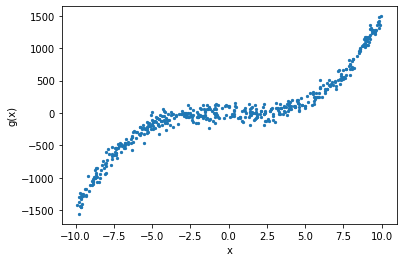

In [10]:
def g(x, c): 
    return sum([c[i] * x**i for i in range(len(c))])

num_data_points = 500
degree = 3

np.random.seed(0)
poly_X = np.random.uniform(-10, 10, num_data_points)
c = [np.random.uniform(-3, 3) for _ in range(degree + 1)]
poly_y = np.array( [g(poly_X[i], c) for i in range(num_data_points)] )

mu, sigma = 0, 75
noise = np.random.normal(mu, sigma, num_data_points)

poly_y = np.add(poly_y, noise)

plt.scatter(poly_X, poly_y, s = 5)
plt.xlabel("x")
plt.ylabel("g(x)")


In [11]:
class Poly(torch.nn.Module):
  def __init__(self, grad):
        super().__init__()
        self.c = torch.nn.Parameter(torch.rand(grad + 1), requires_grad=True)
        self.exponents = torch.arange(0, grad+1)
        self.grad = grad

        
        
  def forward(self, x):
      return torch.pow(x,self.exponents) @ self.c.T

In [12]:
# def train_poly(model, lr, epochs, x, y):
#     predictions = [] # wir zeichnen unsere Predictions auf

#     for _ in range(epochs):
#         y_prediction = model.forward(x)
#         predictions.append(y_prediction.reshape(-1).tolist())
#         mse = torch.mean((y - y_prediction)**2)
#         mse.backward()
#         with torch.no_grad():
#             for param in model.parameters():
#                 param.sub_(param.grad * lr)
#         model.zero_grad()
    
#     return predictions

In [13]:
def train_poly(model, lr, epochs, x, y):
    predictions = []
    optim = torch.optim.SGD(params=model.parameters(), lr=lr)
    loss_func = torch.nn.MSELoss(reduction="mean")

    for _ in range(epochs):
        optim.zero_grad()
        y_prediction = model.forward(x)
        predictions.append(y_prediction.reshape(-1).tolist())
        loss = loss_func(y_prediction, y)
        loss.backward()
        optim.step()
    
    return predictions

In [14]:
# test = torch.arange(0,500, dtype=torch.float).reshape(-1,1)
# testexp = torch.arange(0,3)
# c= torch.rand(3, dtype=torch.float)
# final = torch.pow(test, testexp)
# print(final @ c)


In [15]:
poly_X=torch.tensor(poly_X, dtype=torch.float).reshape(-1,1)
poly_y=torch.tensor(poly_y, dtype=torch.float)


In [16]:
poly_regr = Poly(2)
poly_pred = train_poly(poly_regr, 0.001, 100, poly_X, poly_y)
poly_df = pd.DataFrame(poly_y, columns=["y"]) # Python-Generator-Syntax
poly_df["y_pred"] = poly_pred[99]
poly_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  # This is added back by InteractiveShellApp.init_path()


y  y_pred
0     42.207191     NaN
1    101.518677     NaN
2    -15.524357     NaN
3   -121.848793     NaN
4    -26.865561     NaN
..          ...     ...
495 -204.336426     NaN
496   68.826027     NaN
497  -49.905113     NaN
498 -164.720795     NaN
499  -61.334869     NaN

[500 rows x 2 columns]

# Aufgabe 4
In der Einstiegspräsentation haben wir gesehen, dass ein Neural Network aus aufeinandergestapelten Schichten linearer Funktionen und nicht-linearer Funktionen besteht. Implementieren Sie ein eigenes PyTorch-Modul, was eine nicht-lineare Funktion repräsentiert (Tipp: Nutzen Sie nicht das Polynom aus Aufgabe 3 sondern wählen Sie eine aus der Einstiegspräsentation). Bauen Sie aus diesem Modul und Ihrem Modul aus Aufgabe 1 einen Stapel "lineare Funktion → nicht-lineare Funktion → lineare Funktion" (bspw. mithilfe von [`torch.nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)). Wie schlägt sich dieses MLP im Training mit Ihren mehrdimensionalen Beispieldaten aus 2.?

In [17]:
class nnetwork(torch.nn.Module):
    '''
    Custom implementation of torch.nn.Linear for exercise 4.
    '''
    def __init__(self, n, m):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(in_features=n, out_features=4, bias=True),
            torch.nn.Sigmoid(),
            torch.nn.Linear(in_features=4, out_features=m, bias=True)
        )
        
    def forward(self, x):
        return self.model(x)



In [18]:
def train_nn(model, lr, epochs, x, y):
    # optim = torch.optim.SGD(params=model.parameters(), lr=lr)
    # loss_func = torch.nn.MSELoss(reduction="mean")
    
    # predictions = []

    # for _ in range(epochs):
    #     optim.zero_grad()
    #     y_prediction = model.forward(x)
    #     predictions.append(y_prediction.tolist())
    #     loss = loss_func(y_prediction, y)
    #     loss.backward()
    #     optim.step()
    
    # return predictions

    def train(model, lr, epochs, x, y):
      predictions = [] # wir zeichnen unsere Predictions auf

    for _ in range(epochs):
        y_prediction = model.forward(x)
        predictions.append(y_prediction.tolist())
        mse = torch.mean((y - y_prediction)**2)
        mse.backward()
        with torch.no_grad():
            for param in model.parameters():
                param.sub_(param.grad * lr)
        model.zero_grad()
    
    return predictions

In [19]:
# model_transformation1 = nnetwork(input_dim,output_dim)
# #model_predictions1 = train_modul(model_transformation, lr=0.001, epochs=20, x=x_1, y=y_1)
# y_prediction_modul1 = model_transformation1.forward(x)
# squared_errors1 = (y - y_prediction_modul1)**2
# mse1 = torch.mean(squared_errors1)
# print(mse1.requires_grad)
# mse1.backward()
# for param in model_transformation1.parameters():
#     # .item() macht aus einem PyTorch-Wert wieder einen Python-Wert:
#     print(f"Parameter: {param.detach().numpy()}\tGradient: {param.grad}") 

# step_size = 0.001
# print("\n\n\n\n\n\n\n\n")
# # Wir wollen jetzt unsere Parameter aktualisieren, das geht nur, wenn wir keine weiteren Gradienten aufzeichnen
# # (Python Context Manager):
# with torch.no_grad(): 
#     for param in model_transformation1.parameters():
#         print(f"Parameter: {param.numpy()}\tGradient: {param.grad.numpy()}")
#         param.sub_(step_size * param.grad) # .sub_ ist in-place
#         print(f"Nach Optimierungsschritt: {param.numpy()}")

In [20]:
model = nnetwork(input_dim, output_dim)
pred_nn = train_nn(model, 0.001, 100, x, y)

In [21]:
np.shape(pred_nn)

(300, 50, 2)

In [22]:
nn_df = pd.DataFrame(y, columns=["y_1", "y_2"]) # Python-Generator-Syntax
nn_df["nn_y_pred"] = pred_nn[99]
nn_df[:20]


y_1               y_2  \
0   tensor(135.3179)  tensor(150.3179)   
1   tensor(104.3628)  tensor(119.3628)   
2   tensor(227.5735)  tensor(242.5735)   
3   tensor(167.4390)  tensor(182.4390)   
4   tensor(149.4968)  tensor(164.4968)   
5   tensor(107.1388)  tensor(122.1388)   
6   tensor(171.4854)  tensor(186.4854)   
7   tensor(125.6241)  tensor(140.6241)   
8   tensor(175.5322)  tensor(190.5322)   
9   tensor(112.3539)  tensor(127.3539)   
10  tensor(210.1355)  tensor(225.1355)   
11  tensor(117.1420)  tensor(132.1420)   
12   tensor(61.9852)   tensor(76.9852)   
13  tensor(113.5656)  tensor(128.5656)   
14  tensor(121.1410)  tensor(136.1410)   
15  tensor(143.5349)  tensor(158.5349)   
16  tensor(130.5628)  tensor(145.5628)   
17   tensor(81.7053)   tensor(96.7053)   
18  tensor(247.9178)  tensor(262.9178)   
19  tensor(195.1588)  tensor(210.1588)   

                                   nn_y_pred  
0    [134.30894470214844, 147.0526885986328]  
1   [105.51387786865234, 114.96941375732422]  
2   [229.20809936523438, 252.49722290039062]  
3   [165.23240661621094, 177.38633728027344]  
4    [150.3721466064453, 166.71316528320312]  
5   [107.78585052490234, 118.34860229492188]  
6   [172.90072631835938, 190.01792907714844]  
7    [125.4813003540039, 140.94244384765625]  
8   [177.59600830078125, 192.21058654785156]  
9   [115.03779602050781, 128.36317443847656]  
10   [209.7143096923828, 225.03286743164062]  
11  [115.65442657470703, 126.41370391845703]  
12   [59.896480560302734, 65.29348754882812]  
13   [111.5150375366211, 121.24462127685547]  
14  [123.82594299316406, 135.61380004882812]  
15         [141.00390625, 154.7965087890625]  
16   [127.0193862915039, 138.40643310546875]  
17     [79.06044006347656, 88.7717056274414]  
18    [246.9010772705078, 269.2761535644531]  
19   [200.3001251220703, 218.59210205078125]